# Regression Analysis

In [81]:
#Import of needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

### 1. Read Data

In [82]:
#Read Data
kc_houses = pd.read_csv("/Users/juliaschafer/nf-sep-20/cgn-2020-ds-Project-EDA/cleansed_King_County_House_Prices.csv")

# to suppress scientifc notation of  numbers:
pd.options.display.float_format = '{:20,.2f}'.format

#enable horizontal scrolling in dataframes
pd.set_option("display.max_columns", None)

In [83]:
kc_houses.head()

,date,price,bedrooms,bathrooms,qm_living,qm_lot,floors,waterfront,view,condition,grade,qm_above_ground,qm_basement,yr_built,yr_renovated,zipcode,yrs_since_renovation,house_age,yrs_built_ren,lat,long,qm_living15,qm_lot15,renovated
0,10,"221,900.00",3,1.00,109.63,524.90,1.00,0.00,0.00,3,7,359.66,0.00,1955,0.00,98178,0.00,60,"1,955.00",47.51,-122.26,124.49,524.90,0
1,12,"538,000.00",3,2.25,238.76,672.80,2.00,0.00,0.00,3,7,661.42,121.92,1951,"1,991.00",98125,24.00,64,-40.00,47.72,-122.32,157.01,709.69,1
2,2,"180,000.00",2,1.00,71.53,929.03,1.00,0.00,0.00,3,6,234.70,0.00,1933,0.00,98028,0.00,82,"1,933.00",47.74,-122.23,252.70,748.98,0
3,12,"604,000.00",4,3.00,182.09,464.51,1.00,0.00,0.00,5,7,320.04,277.37,1965,0.00,98136,0.00,50,"1,965.00",47.52,-122.39,126.35,464.51,0
4,2,"510,000.00",3,2.00,156.08,750.66,1.00,0.00,0.00,3,8,512.06,0.00,1987,0.00,98074,0.00,28,"1,987.00",47.62,-122.05,167.22,697.05,0


### 2. Handling categorical variables 

Since some variables aren't metric but ordinal or nominal data, they are converted to categories and dummies, respectively.

In [84]:
X_cat = pd.get_dummies(kc_houses[['view', 'waterfront', 'condition', 'grade', 'zipcode', 'date','renovated']].astype('category'), drop_first = True)

In [85]:
kc_houses = pd.concat([kc_houses, X_cat], axis = 1)

In [86]:
kc_houses.head()

,date,price,bedrooms,bathrooms,qm_living,qm_lot,floors,waterfront,view,condition,grade,qm_above_ground,qm_basement,yr_built,yr_renovated,zipcode,yrs_since_renovation,house_age,yrs_built_ren,lat,long,qm_living15,qm_lot15,renovated,view_1.0,view_2.0,waterfront_1.0,condition_3,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,date_2,date_3,date_4,date_5,date_6,date_7,date_8,date_9,date_10,date_11,date_12,renovated_1
0,10,"221,900.00",3,1.00,109.63,524.90,1.00,0.00,0.00,3,7,359.66,0.00,1955,0.00,98178,0.00,60,"1,955.00",47.51,-122.26,124.49,524.90,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,12,"538,000.00",3,2.25,238.76,672.80,2.00,0.00,0.00,3,7,661.42,121.92,1951,"1,991.00",98125,24.00,64,-40.00,47.72,-122.32,157.01,709.69,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,2,"180,000.00",2,1.00,71.53,929.03,1.00,0.00,0.00,3,6,234.70,0.00,1933,0.00,98028,0.00,82,"1,933.00",47.74,-122.23,252.70,748.98,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,12,"604,000.00",4,3.00,182.09,464.51,1.00,0.00,0.00,5,7,320.04,277.37,1965,0.00,98136,0.00,50,"1,965.00",47.52,-122.39,126.35,464.51,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,"510,000.00",3,2.00,156.08,750.66,1.00,0.00,0.00,3,8,512.06,0.00,1987,0.00,98074,0.00,28,"1,987.00",47.62,-122.05,167.22,697.05,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### 2. Correlation Heat Map

In [87]:
#definition of a variable containing all columns to correlate 
correlations = kc_houses[['price', 'bedrooms', 'bathrooms', 'qm_living', 'qm_lot',
       'floors', 'qm_above_ground', 'qm_basement', 'yrs_since_renovation', 'house_age', 'yrs_built_ren', 'lat', 'long',
       'qm_living15', 'qm_lot15']].corr()

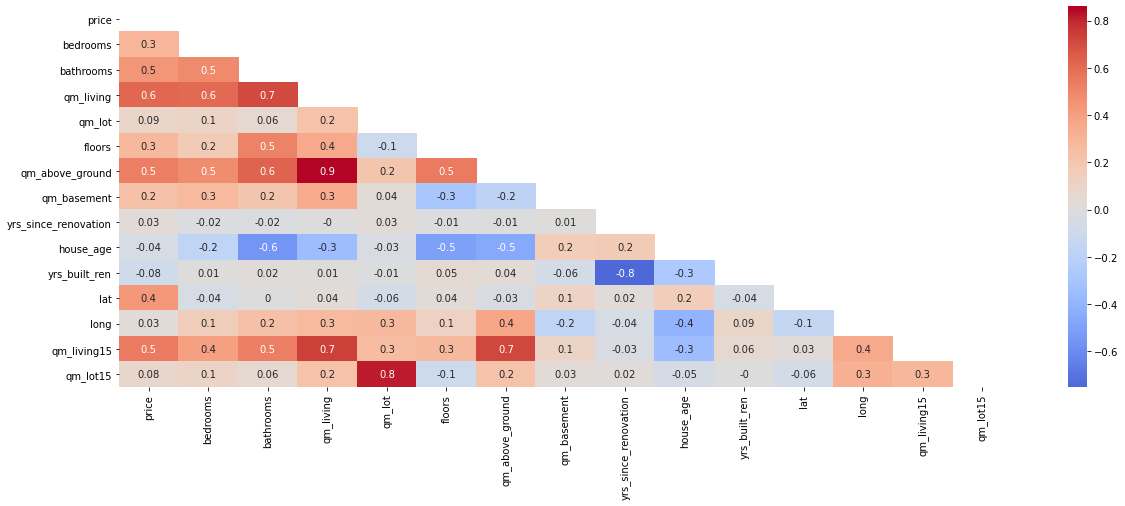

In [88]:
#heat map with correlations
mp.figure(figsize=(20, 7))
mask = np.triu(correlations)
sns.heatmap(round(correlations, 2), 
            annot = True, 
            fmt='.1g', 
            center= 0, 
            cmap= 'coolwarm', 
            mask = mask);

__Interpretation of correlations (Cohen)__: 
* strong correlation: r = .5
* moderate correlation: r = .3
* weak correlation: r = .1

Price correlates strongly with bathrooms
  * Bathrooms
  * Living footage
  * Living footage above ground
  * Living footage of neighbours
  
Moderate correlations:
  * Lat coordinate
  * floors
  * bedrooms
  
Weak:
  * view
  * basement footage

The table hints towards strong multicollinearities between predictor variables (variables are correlated to each other). 

In [89]:
#scatter plots to visualize dependencies of variables in order to get hints towards linearity of variables and homoscedasticity.
pd.plotting.scatter_matrix(kc_houses[['price', 'bedrooms', 'bathrooms', 'qm_living', 'qm_lot',
       'floors', 'qm_above_ground', 'qm_basement', 'yrs_since_renovation', 'house_age', 'yrs_built_ren', 'lat', 'long',
       'qm_living15', 'qm_lot15']], figsize = (20, 20));

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7faccff3c840> (for post_execute):


KeyboardInterrupt: 

Unfortunately, the scatter plots show that linearity, homoscedasticity are not given in most cases. Let's give it a try anyway.

### First Regression Model

The first regression model takes all variables correlated with the price plus zip code, grade, view, month, condition since descriptively these variables might be predictors (see EDA).

In [90]:
#Define predictors and dependent variable 
X_num = kc_houses[['bedrooms', 'bathrooms', 'qm_living',  'floors', 'qm_above_ground', 'qm_basement', 'yr_renovated', 'lat', 'qm_living15']]
X_tot = pd.concat([X_cat, X_num], axis = 1)
X = X_tot
y = kc_houses['price']

In [91]:
#make a training-test-split. The model will train on 2/3 of data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [92]:
#regression model 
model = sm.OLS(y_train,X_train)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              3944.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):                        0.00
Time:                        23:54:59   Log-Likelihood:                     -1.6590e+05
No. Observations:               12881   AIC:                                  3.320e+05
Df Residuals:                   12779   BIC:                                  3.328e+05
Df Model:                         102                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
view_1.0         6.905e+04   7216.079      9.568      0.000    5.49e+04    8.32e+04
view_2.0         6.748e+04   4480.278     15.061      0.000    5.87e+04    7.63e+04
waterfront_1.0   3.111e+05   4.39e+04      7.080      0.000    2.25e+05    3.97e+05
condition_3      1.511e+04      1e+04      1.506      0.132   -4561.644    3.48e+04
condition_4      4.379e+04   1.01e+04      4.338      0.000     2.4e+04    6.36e+04
condition_5      8.688e+04   1.04e+04      8.333      0.000    6.64e+04    1.07e+05
grade_6          1533.5716   8518.479      0.180      0.857   -1.52e+04    1.82e+04
grade_7          1.298e+04   8318.091      1.561      0.119   -3322.007    2.93e+04
grade_8          4.439e+04   8664.045      5.123      0.000    2.74e+04    6.14e+04
grade_9          1.309e+05   9318.159     14.050      0.000    1.13e+05    1.49e+05
grade_10         1.991e+05   1.04e+04     19.117      0.000    1.79e+05    2.19e+05
grade_11         2.925e+05   1.45e+04     20.203      0.000    2.64e+05    3.21e+05
zipcode_98002    9372.2239   1.05e+04      0.896      0.370   -1.11e+04    2.99e+04
zipcode_98003    4670.9221   9515.954      0.491      0.624    -1.4e+04    2.33e+04
zipcode_98004    6.078e+05   1.01e+04     60.164      0.000    5.88e+05    6.28e+05
zipcode_98005    3.363e+05   1.13e+04     29.842      0.000    3.14e+05    3.58e+05
zipcode_98006    2.623e+05   8914.680     29.427      0.000    2.45e+05     2.8e+05
zipcode_98007    2.499e+05   1.22e+04     20.541      0.000    2.26e+05    2.74e+05
zipcode_98008    2.418e+05   9624.543     25.124      0.000    2.23e+05    2.61e+05
zipcode_98010    7.278e+04    1.5e+04      4.845      0.000    4.33e+04    1.02e+05
zipcode_98011    1.503e+05   1.09e+04     13.731      0.000    1.29e+05    1.72e+05
zipcode_98014    1.253e+05   1.44e+04      8.731      0.000    9.72e+04    1.53e+05
zipcode_98019    8.968e+04   1.12e+04      7.995      0.000    6.77e+04    1.12e+05
zipcode_98022    5255.7292    1.1e+04      0.479      0.632   -1.63e+04    2.68e+04
zipcode_98023   -1.498e+04   8313.321     -1.802      0.072   -3.13e+04    1313.087
zipcode_98024    1.596e+05   1.88e+04      8.486      0.000    1.23e+05    1.96e+05
zipcode_98027    1.947e+05   8892.891     21.899      0.000    1.77e+05    2.12e+05
zipcode_98028    1.412e+05   9766.995     14.461      0.000    1.22e+05     1.6e+05
zipcode_98029    2.261e+05   9460.175     23.899      0.000    2.08e+05    2.45e+05
zipcode_98030    7989.0051   9850.567      0.811      0.417   -1.13e+04    2.73e+04
zipcode_98031    1.537e+04   9635.545      1.595      0.111   -3516.189    3.43e+04
zipcode_98032    1.182e+04    1.3e+04      0.911      0.362   -1.36e+04    3.73e+04
zipcode_98033    3.459e+05   8690.712     39

Now let's see what the model predicts for the test data:

In [93]:
#predict values of test data
y_pred = model_fit.predict(X_test)

In order to test for the goodness-of-fit of the model for the test data, the mean absolute percentage error (MAPE) is calculated. The smaller the MAPE score, the better the model fits the test data.
The MAPE can be interpreted as:
* under 10:  highly accurate forecasting
* 10 to 20: good forecasting
* over 20 to 50: reasonable forecasting
* over 50: bad forecasting

In [94]:
def mape(actual, pred): 
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape(y_test, y_pred)

15.030252075652253

This looks good but multicollinearity is a problem and the model is not very parsimonious. I also guess that the model might be overfitted.

In the following, not every iteration of feature engineering is shown but only the final model. 
At first, I chose features based on correlations with the dependent variable and significance of features in the prior models but came to the conclusion that this wasn't very helpful. 

The final model is the result of theoretical assumptions based on the EDA, keeping multicollinearity in mind - and, last but not least, a bit trial and error. 

### Final model

The following predictors will be dropped in the next model since their r squared is too low: bedrooms, floors, month cat, cond_cat, waterfront

In [95]:
price_per_qm = kc_houses.price/ kc_houses.qm_living
price_per_qm.name = 'price_per_qm'

In [96]:
logprice = np.log(kc_houses.price)

In [97]:
#Define predictors and dependent variable 
X_cat = pd.get_dummies(kc_houses[[ 'grade', 'view', 'zipcode', 'date']].astype('category'), drop_first = True)
X_num = kc_houses[['qm_living']]
X_tot = pd.concat([X_cat, X_num], axis = 1)
X = X_tot
y = kc_houses['price']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [99]:
model = sm.OLS(y_train,X_train)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              4139.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):                        0.00
Time:                        23:55:02   Log-Likelihood:                     -1.6646e+05
No. Observations:               12881   AIC:                                  3.331e+05
Df Residuals:                   12792   BIC:                                  3.338e+05
Df Model:                          89                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
grade_6       -2088.6538   6577.086     -0.318      0.751    -1.5e+04    1.08e+04
grade_7        6613.6766   6266.179      1.055      0.291   -5668.971    1.89e+04
grade_8        3.664e+04   6746.643      5.431      0.000    2.34e+04    4.99e+04
grade_9        1.295e+05   7590.640     17.066      0.000    1.15e+05    1.44e+05
grade_10           2e+05   8967.197     22.302      0.000    1.82e+05    2.18e+05
grade_11       3.037e+05   1.36e+04     22.278      0.000    2.77e+05     3.3e+05
view_1.0       7.528e+04   7475.733     10.071      0.000    6.06e+04    8.99e+04
view_2.0       7.638e+04   4602.809     16.595      0.000    6.74e+04    8.54e+04
zipcode_98002  1.587e+04   1.01e+04      1.575      0.115   -3879.056    3.56e+04
zipcode_98003  6755.5983   9233.898      0.732      0.464   -1.13e+04    2.49e+04
zipcode_98004  6.318e+05   9748.278     64.808      0.000    6.13e+05    6.51e+05
zipcode_98005  3.619e+05   1.11e+04     32.637      0.000     3.4e+05    3.84e+05
zipcode_98006  2.827e+05   8429.780     33.533      0.000    2.66e+05    2.99e+05
zipcode_98007  2.619e+05   1.21e+04     21.636      0.000    2.38e+05    2.86e+05
zipcode_98008  2.531e+05   9302.172     27.211      0.000    2.35e+05    2.71e+05
zipcode_98010  8.436e+04   1.52e+04      5.567      0.000    5.47e+04    1.14e+05
zipcode_98011  1.529e+05   1.08e+04     14.167      0.000    1.32e+05    1.74e+05
zipcode_98014  1.204e+05   1.43e+04      8.391      0.000    9.23e+04    1.48e+05
zipcode_98019  8.713e+04   1.11e+04      7.861      0.000    6.54e+04    1.09e+05
zipcode_98022  2.237e+04   1.08e+04      2.069      0.039    1180.007    4.36e+04
zipcode_98023 -1.369e+04   7857.362     -1.742      0.082   -2.91e+04    1715.665
zipcode_98024  1.643e+05   1.92e+04      8.550      0.000    1.27e+05    2.02e+05
zipcode_98027  1.967e+05   8485.226     23.186      0.000     1.8e+05    2.13e+05
zipcode_98028  1.424e+05   9451.631     15.069      0.000    1.24e+05    1.61e+05
zipcode_98029  2.224e+05   9134.680     24.350      0.000    2.05e+05     2.4e+05
zipcode_98030  7739.9979   9585.664      0.807      0.419    -1.1e+04    2.65e+04
zipcode_98031  2.109e+04   9352.399      2.255      0.024    2761.401    3.94e+04
zipcode_98032  6968.2149   1.29e+04      0.538      0.590   -1.84e+04    3.23e+04
zipcode_98033  3.569e+05   8254.906     43.232      0.000    3.41e+05    3.73e+05
zipcode_98034  1.925e+05   7687.448     25.043      0.000    1.77e+05    2.08e+05
zipcode_98038  3.592e+04   7617.119      4.716      0.000     2.1e+04    5.09e+04
zipcode_98039  8.414e+05   2.72e+04     30.959      0.000    7.88e+05    8.95e+05
zipcode_98040  4.978e+05   1.04e+04     47.803      0.000    4.77e+05    5.18e+05
zipcode_98042  1.678e+04   7584.

In [100]:
y_pred = model_fit.predict(X_test)

In [101]:
mape(y_test, y_pred)

15.473319801375569

Although the MAPE score is worse than in the first model, I prefer this one since it's parsimonious, multicollinearity is reduced a lot (only grade and qm_living are correlated, see heatmap below) and a great amount of variance is explained by the model.


#### Heat map

In [102]:
#definition of a variable containing all columns to correlate 
correlations = kc_houses[[ 'qm_living', 'grade', 'view', 'zipcode', 'date']].corr()

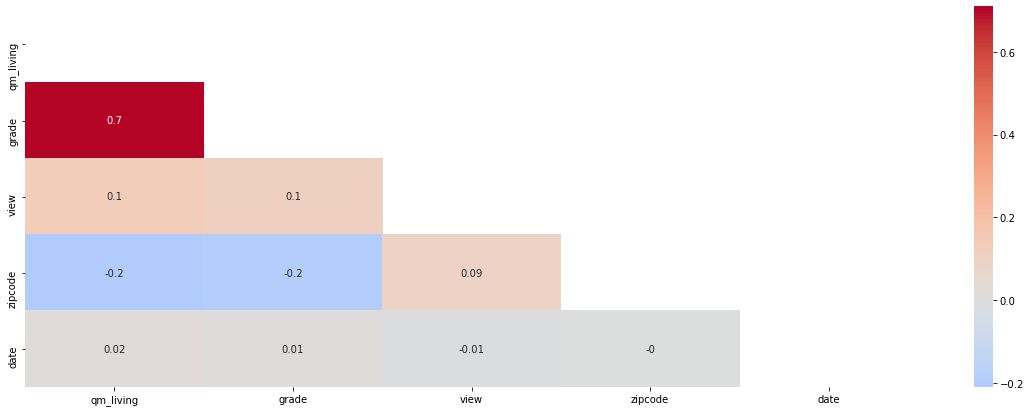

In [103]:
#heat map with correlations
mp.figure(figsize=(20, 7))
mask = np.triu(correlations)
sns.heatmap(round(correlations, 2), 
            annot = True, 
            fmt='.1g', 
            center= 0, 
            cmap= 'coolwarm', 
            mask = mask);
mp.savefig('heatmap_model.jpeg')